### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score #pasar esta a houses
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


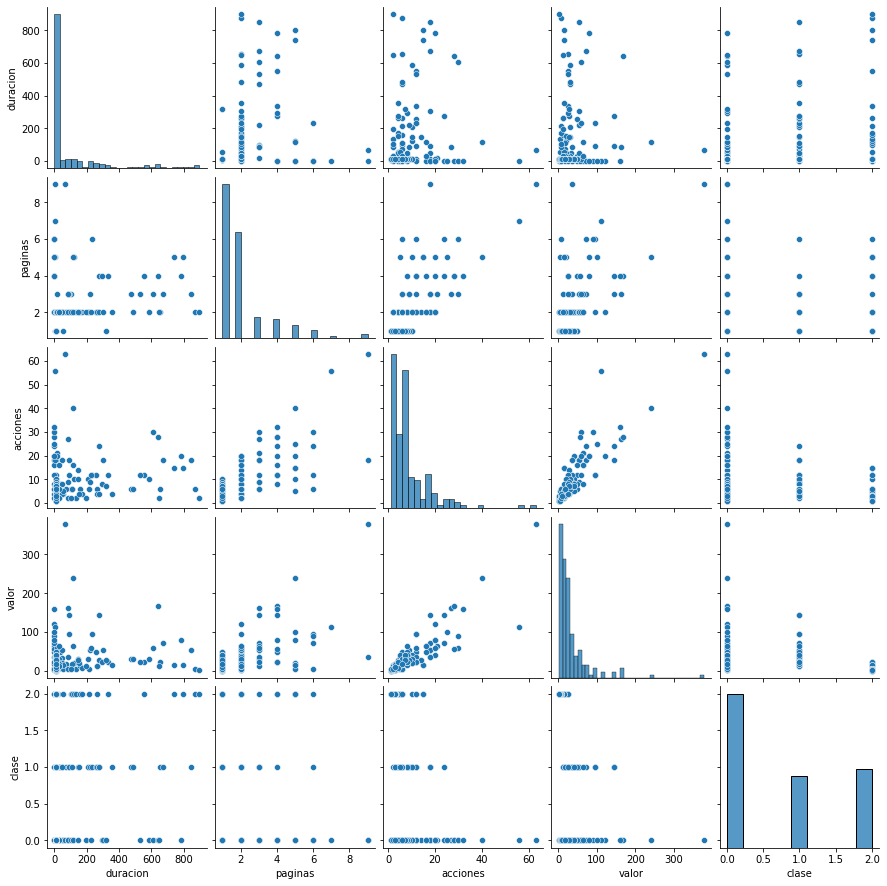

In [3]:
sns.pairplot(dataframe)

<AxesSubplot:>

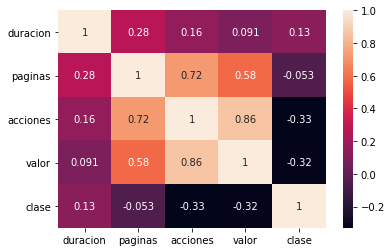

In [4]:
sns.heatmap(dataframe.corr(), annot = True)

In [5]:
X = np.array(dataframe.drop(['duracion'], 1))
y = np.array(dataframe['duracion'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 100)

In [7]:
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [12]:
score = model.score(X_train,y_train)

In [9]:
print(model.intercept_)

7.918024242315909


In [10]:
model.coef_

array([24.77882487,  5.24459925, -1.16900457, 49.67376483])

In [11]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [29]:
model.score(X_test, y_test) *100

2.2807840397771617

In [30]:
model.score(X_test, y_test) *100

2.2807840397771617

In [36]:
predictions = model.predict(X_test)

In [37]:
from sklearn import metrics

In [13]:
print('¿Qué acierto tiene?', score)

¿Qué acierto tiene? 0.10851198391171235


In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 140.22825219567937
MSE: 42946.23473838036
RMSE: 207.23473342656717


In [14]:
print ('Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?, tienen mucha coherencia')

Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?, tienen mucha coherencia
Object `dataset` not found.


In [15]:
print('¿Es la regresión un buen método para este dataset?, NO, no creo que la regresion sea el mejor metodo')

¿Es la regresión un buen método para este dataset?, NO, no creo que la regresion sea el mejor metodo
